# Plot WG vel vectors on a map

* Give a time or a time range

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import requests
import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory

In [2]:
# List of WGs
WG_list = ['WHOI32','WHOI43','STOKES', 'PLANCK', 'PASCAL', 'CARSON', 'KELVIN'] #leave Kelvin out because of ADCP problem in IOP1
path='../data/raw/WG_NRT/'

In [3]:
# Make a list of the files:
n=0
file_list = []
for WG in WG_list:
    file = path+'adcp_'+WG+'.nc'
    file_list.append(file)

In [4]:
# Read in cleaned ADCP files from all WG
n=0
for WG in WG_list:
    file = file_list[n]
    varstr = 'adcp_'+WG
    locals()[varstr]=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
    n=n+1
    print(file)


../data/raw/WG_NRT/adcp_WHOI32.nc
../data/raw/WG_NRT/adcp_WHOI43.nc
../data/raw/WG_NRT/adcp_STOKES.nc
../data/raw/WG_NRT/adcp_PLANCK.nc
../data/raw/WG_NRT/adcp_PASCAL.nc
../data/raw/WG_NRT/adcp_CARSON.nc


Skipping WHOI32
Skipping PLANCK


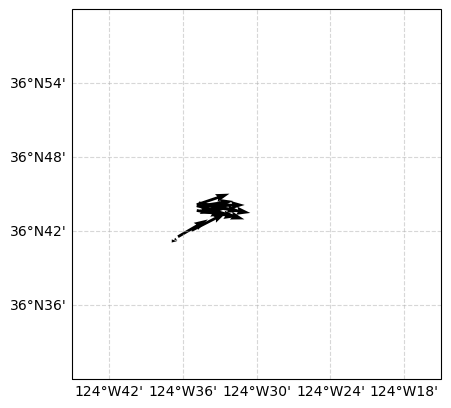

In [73]:
tmin = np.datetime64('2022-10-25T00:00:00')
tmax = tmin+np.timedelta64(4,'h')#np.datetime64('now')
z0 = -4
scale = 5
skip = 4
xmin, xmax = (-124.75,-124.25)
ymin, ymax = (36.5, 37.0)
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

for WG in WG_list:
    n=n+1
    ds = eval('adcp_'+WG)
    tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
    tind=tind[0:-1:skip]
    zind = np.flatnonzero(np.abs(ds.depth-z0)==np.min(np.abs(ds.depth-z0)))
    if not len(tind):
        print('Skipping '+WG)
        continue
    else: 
        plt.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[zind, tind].values),np.squeeze(ds.current_north[zind, tind].values),scale=scale,transform=ccrs.PlateCarree())


In [36]:
np.shape(np.squeeze(ds.current_east[zind, tind]))

(246,)

In [42]:
np.shape(zind)

(2,)

In [43]:
WG

'PASCAL'

In [37]:
if not len(tind) and len(zind): print('OK')